In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the Excel file into a DataFrame
df = pd.read_csv("../SEO/sample.csv" )

In [3]:
df

,website,Content Length,Referring Domains Landing Page,Video Usage,Ordered List,Markups,Readability,Core Web Vitals,Speed,https,Mobile,Indexed Keywords,Referring Domains,Backlinks,Follow links,Rank
0,gatlinburg.com/places-to-stay/cabins-and-chalets/,604 words,96,No,Yes,No,57,No,30,Yes,Yes,8500,5100,99500,0.92,1
1,cabinsofthesmokymountains.com/,1000,4200,No,Yes,Yes,60,Yes,39,Yes,Yes,54300,4200,68800,0.90,2
2,cabinsforyou.com,3655 words,203,No,Yes,No,62,Yes,47,Yes,Yes,53800,3900,97000,0.94,3
3,smokymountains.com/gatlinburg/cabins/,554 words,116,No,Yes,No,91,No,54,Yes,Yes,9600,12400,820000,0.97,4
4,https://www.vrbo.com/vacation-rentals/cabins/u...,900,35,No,Yes,No,60,No,24,Yes,Yes,1500,110000,21900000,0.60,5
5,auntbugs.com,1425 words,163,No,Yes,Yes,43,Yes,29,Yes,Yes,30000,2000,9200,0.77,6
6,patriotgetaways.com,1900 words,309,No,Yes,Yes,49,Yes,46,Yes,Yes,56700,3700,23500,0.74,7
7,www.yourcabin.com/cabin-rentals/gatlinburg-cab...,7886 words,23,No,Yes,Yes,60,Yes,47,Yes,Yes,1300,2800,17200,0.62,8
8,elkspringsresort.com,704 words,175,Yes,Yes,No,54,Yes,41,Yes,Yes,31000,2100,9600,0.73,9
9,cabinsusagatlinburg.com,1526 words,162,No,Yes,No,63,No,77,Yes,Yes,30900,10900,2300,0.59,10


In [4]:
# Convert 'Content Length' to int
df['Content Length'] = df['Content Length'].str.replace(' words', '').astype(int)

In [5]:
# Convert categorical to numerical
binary_columns = ['Video Usage', 'Ordered List', 'Markups', 'Core Web Vitals', 'https', 'Mobile']
for col in binary_columns:
    df[col] = df[col].map({'No': 0, 'Yes': 1}).astype(int)

In [6]:
df

,website,Content Length,Referring Domains Landing Page,Video Usage,Ordered List,Markups,Readability,Core Web Vitals,Speed,https,Mobile,Indexed Keywords,Referring Domains,Backlinks,Follow links,Rank
0,gatlinburg.com/places-to-stay/cabins-and-chalets/,604,96,0,1,0,57,0,30,1,1,8500,5100,99500,0.92,1
1,cabinsofthesmokymountains.com/,1000,4200,0,1,1,60,1,39,1,1,54300,4200,68800,0.90,2
2,cabinsforyou.com,3655,203,0,1,0,62,1,47,1,1,53800,3900,97000,0.94,3
3,smokymountains.com/gatlinburg/cabins/,554,116,0,1,0,91,0,54,1,1,9600,12400,820000,0.97,4
4,https://www.vrbo.com/vacation-rentals/cabins/u...,900,35,0,1,0,60,0,24,1,1,1500,110000,21900000,0.60,5
5,auntbugs.com,1425,163,0,1,1,43,1,29,1,1,30000,2000,9200,0.77,6
6,patriotgetaways.com,1900,309,0,1,1,49,1,46,1,1,56700,3700,23500,0.74,7
7,www.yourcabin.com/cabin-rentals/gatlinburg-cab...,7886,23,0,1,1,60,1,47,1,1,1300,2800,17200,0.62,8
8,elkspringsresort.com,704,175,1,1,0,54,1,41,1,1,31000,2100,9600,0.73,9
9,cabinsusagatlinburg.com,1526,162,0,1,0,63,0,77,1,1,30900,10900,2300,0.59,10


In [7]:
X = df.drop(columns=['website', 'Rank'])
y = df['Rank']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
model = xgb.XGBRegressor()

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    # ... you can add more hyperparameters based on your needs
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [10]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


In [11]:
best_model = grid_search.best_estimator_

In [12]:
feature_importance = best_model.feature_importances_
sorted_idx = feature_importance.argsort()

for index in sorted_idx:
    print(f"Feature: {X.columns[index]}, Importance: {feature_importance[index]}")

Feature: Ordered List, Importance: 0.0
Feature: Core Web Vitals, Importance: 0.0
Feature: https, Importance: 0.0
Feature: Mobile, Importance: 0.0
Feature: Backlinks, Importance: 0.0
Feature: Markups, Importance: 0.0038636261597275734
Feature: Speed, Importance: 0.008921890519559383
Feature: Referring Domains Landing Page, Importance: 0.009593137539923191
Feature: Readability, Importance: 0.02641904354095459
Feature: Follow links, Importance: 0.030595162883400917
Feature: Indexed Keywords, Importance: 0.052196502685546875
Feature: Video Usage, Importance: 0.05254945904016495
Feature: Content Length, Importance: 0.0862012729048729
Feature: Referring Domains , Importance: 0.729659914970398


### Weight: Features with a higher weight might be more decisive in making predictions.

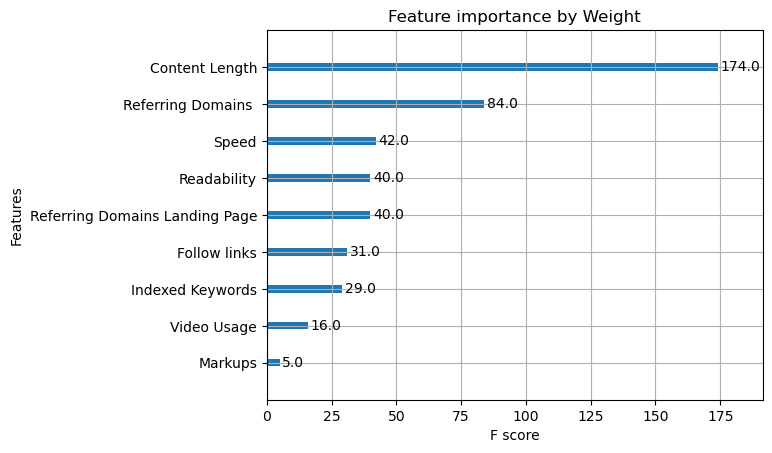

In [13]:
# Weight
xgb.plot_importance(best_model, importance_type='weight', title='Feature importance by Weight')
plt.show()

### Gain: A higher gain means the feature brings more accuracy to the predictions (generally the most useful metric). (USE THIS ONE)

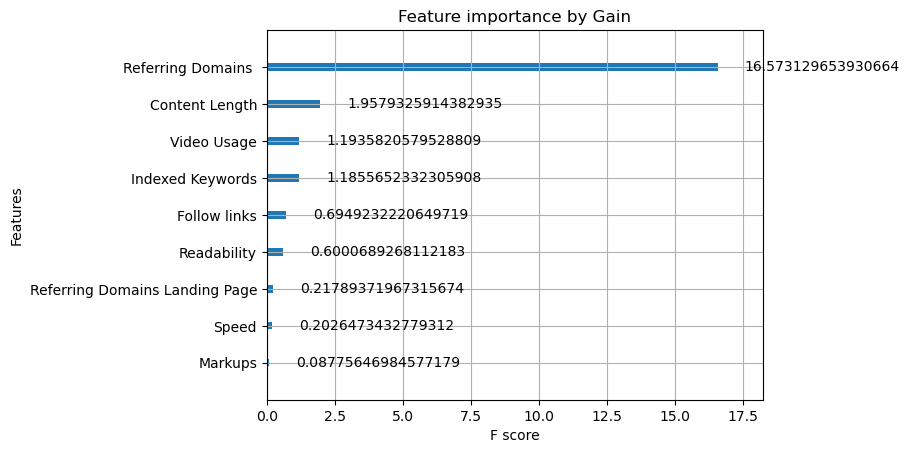

In [14]:
# Gain
xgb.plot_importance(best_model, importance_type='gain', title='Feature importance by Gain')
plt.show()

### Cover: A higher cover indicates the feature is used on large chunks of the dataset.

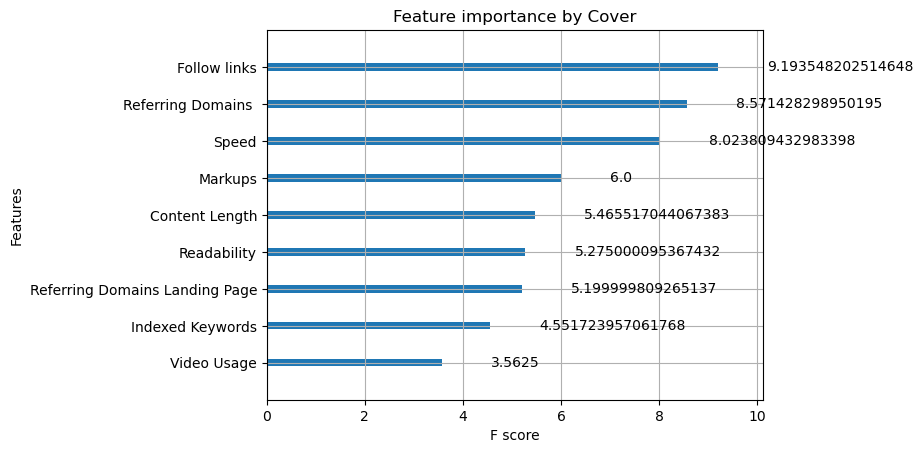

In [15]:
# Cover
xgb.plot_importance(best_model, importance_type='cover', title='Feature importance by Cover')
plt.show()

In [16]:
# Get raw feature importances
importances = best_model.get_booster().get_score(importance_type='gain')

# Convert the raw importances to percentages
total = sum(importances.values())
importance_percentages = {feature: (importance / total) * 100 for feature, importance in importances.items()}

# Sort by importance
sorted_importances = sorted(importance_percentages.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importances:
    print(f"Feature: {feature}, Importance: {importance:.2f}%")


Feature: Referring Domains , Importance: 72.97%
Feature: Content Length, Importance: 8.62%
Feature: Video Usage, Importance: 5.25%
Feature: Indexed Keywords, Importance: 5.22%
Feature: Follow links, Importance: 3.06%
Feature: Readability, Importance: 2.64%
Feature: Referring Domains Landing Page, Importance: 0.96%
Feature: Speed, Importance: 0.89%
Feature: Markups, Importance: 0.39%
